# Evaluating QR simulations

In [3]:
%load_ext autoreload
%autoreload 2

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

datapath = Path.home() / "Box/NASA_Figures/data/validation"

plt.style.use("ggplot")

## Model Comparison

We want to use the winkler score for comparison.

The input will be a list of strings names of the different model runs

Ideally we want as much information as possible in the output without going overboard. I want a dataset unique on:

* model name (n)
* variable (4)
* time period (3)
    * first ten
    * first 20
    * all
* test set (3)
* noise (2)
* interval (3)


In [296]:
from evaluation import compare_models


# model_names = [f"qr_exp{i}" for i in range(5, 9)]
model_names = ["qr_exp19", "qr_exp14", "qr_exp7"]
res = compare_models(model_names).query("timeframe == 'first_10'")#.query("name != 'val_train'")

In [272]:
res

,name,variable,noise,t,interval,score,timeframe,model_name
0,val_train,theta,det,0.00,50,0.000000,first_10,qr_exp19
1,val_train,theta,det,0.01,50,0.002097,first_10,qr_exp19
2,val_train,theta,det,0.02,50,0.004128,first_10,qr_exp19
3,val_train,theta,det,0.03,50,0.005282,first_10,qr_exp19
4,val_train,theta,det,0.04,50,0.006337,first_10,qr_exp19
...,...,...,...,...,...,...,...,...
1709138,test,x_d,high_noise,9.95,95,0.657773,first_10,qr_exp14
1709139,test,x_d,high_noise,9.96,95,0.659128,first_10,qr_exp14
1709140,test,x_d,high_noise,9.97,95,0.660199,first_10,qr_exp14
1709141,test,x_d,high_noise,9.98,95,0.662892,first_10,qr_exp14


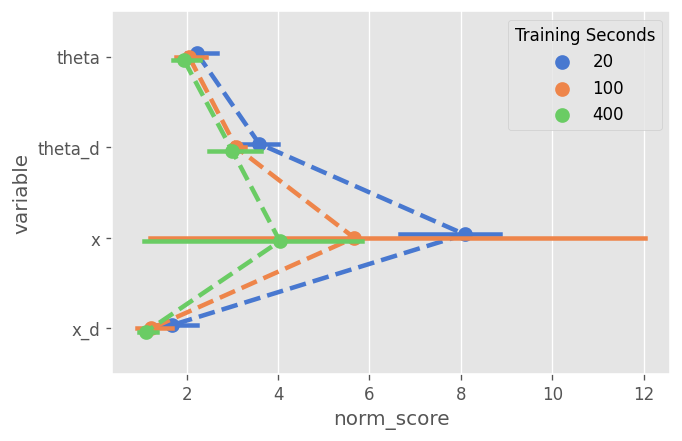

In [299]:
# res["norm_score"] = res.score / res.groupby(["variable", "name", "noise", "interval"])["score"].transform("mean")
# res["norm_score"] = res.score / res.groupby(["variable", "interval"])["score"].transform("mean")
grp_cols = ["name", "variable", "noise", "interval", "model_name"]
res["Training Seconds"] = res.model_name.map({
    "qr_exp14": 20,
    "qr_exp19": 100,
    "qr_exp7": 400,
})
grp_cols = ["variable", "Training Seconds", "name"]
# grp_cols = ["variable", "model_name", "name"]
fig, ax = plt.subplots(dpi=120)
sns.pointplot(
    # res,
    res.groupby(grp_cols, as_index=False)["norm_score"].mean(),
    x="norm_score",
    y="variable",
    hue="Training Seconds",
    # hue="model_name",
    orient="h",
    palette="muted",
    dodge=True,
    ax=ax,
    linestyles="--",
    errorbar="ci",
    order=["theta", "theta_d", "x", "x_d"]
)
# ax.set_xlim(0, None)
plt.show()
# for v in ["x", "theta"]:
#     plt.show()

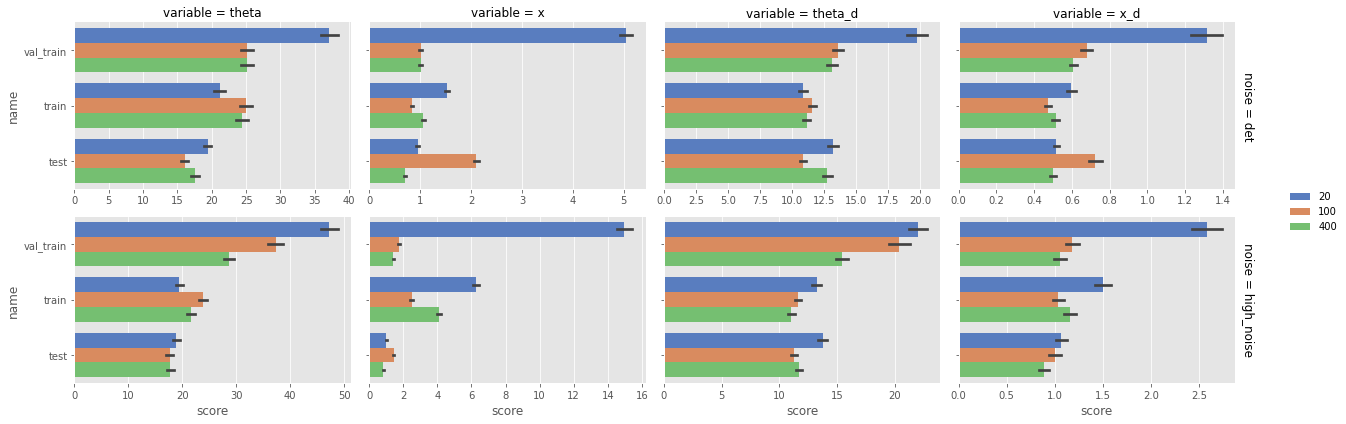

In [301]:
variable = "theta"
name = "test"

def qdf(df, vars):
    qstr = " & ".join(f"{var} == @{var}" for var in vars)
    return df.query(qstr)

# tmp = qdf(res, ["name"])
# tmp = res.copy()

g = sns.FacetGrid(res, row="noise", col="variable", aspect=1.5, margin_titles=True, sharex=False)
# g = sns.FacetGrid(res, row="variable", col="noise", aspect=1.5, margin_titles=True, sharex=False)
# g.map_dataframe(sns.barplot, x="score", y="interval", hue="model_name", orient="h", palette="muted")
g.map_dataframe(sns.barplot, x="score", y="name", hue="Training Seconds", orient="h", palette="muted")
# g.map_dataframe(sns.barplot, x="score", y="name", hue="model_name", orient="h", palette="muted")
g.add_legend()
plt.show()

## Visuals from a single Model

In [311]:
model_name = "qr_exp20"
sims = pd.read_csv(datapath / f"predictions/{model_name}.csv")
sims

,variable,t,lower_50,lower_80,lower_95,upper_50,upper_80,upper_95,actual,name,eval_mode,mean,noise
0,theta,400.00,3.392095,3.392095,3.392095,3.392095,3.392095,3.392095,170.224609,val_train,single,NaN,det
1,theta,400.01,3.483583,3.483583,3.483583,3.483583,3.483583,3.483583,170.258943,val_train,single,NaN,det
2,theta,400.02,3.575767,3.575767,3.575767,3.575767,3.575767,3.575767,170.294188,val_train,single,NaN,det
3,theta,400.03,3.668783,3.668783,3.668783,3.668783,3.668783,3.668783,170.330353,val_train,single,NaN,det
4,theta,400.04,3.762775,3.762775,3.762775,3.762775,3.762775,3.762775,170.367448,val_train,single,NaN,det
...,...,...,...,...,...,...,...,...,...,...,...,...,...
960067,x_d,199.96,-0.521730,-0.730851,-0.820435,0.768270,0.823867,0.932284,-0.892315,test,multi,0.163843,high_noise
960068,x_d,199.97,-0.533938,-0.689599,-0.886337,0.727536,0.805351,0.890629,-0.854783,test,multi,0.139993,high_noise
960069,x_d,199.98,-0.587475,-0.741499,-0.830439,0.751775,0.848741,0.892720,-0.871656,test,multi,0.133494,high_noise
960070,x_d,199.99,-0.542521,-0.682691,-0.864826,0.730794,0.862932,0.906088,-0.824644,test,multi,0.147107,high_noise


In [310]:
sims["t_true"] = sims.t - sims.groupby("name")["t"].transform("min")
sims[sims.t_true < 10]

,variable,t,lower_50,lower_80,lower_95,upper_50,upper_80,upper_95,actual,name,eval_mode,mean,noise,t_true
0,theta,400.00,3.392095,3.392095,3.392095,3.392095,3.392095,3.392095,170.224609,val_train,single,NaN,det,0.00
1,theta,400.01,3.483583,3.483583,3.483583,3.483583,3.483583,3.483583,170.258943,val_train,single,NaN,det,0.01
2,theta,400.02,3.575767,3.575767,3.575767,3.575767,3.575767,3.575767,170.294188,val_train,single,NaN,det,0.02
3,theta,400.03,3.668783,3.668783,3.668783,3.668783,3.668783,3.668783,170.330353,val_train,single,NaN,det,0.03
4,theta,400.04,3.762775,3.762775,3.762775,3.762775,3.762775,3.762775,170.367448,val_train,single,NaN,det,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749066,x_d,9.95,-0.558299,-0.628879,-0.724443,0.559757,0.637638,0.724189,-0.506366,test,multi,-0.019351,high_noise,9.95
749067,x_d,9.96,-0.551087,-0.695020,-0.857182,0.597978,0.672582,0.775845,-0.684764,test,multi,-0.010925,high_noise,9.96
749068,x_d,9.97,-0.575016,-0.717360,-0.877100,0.623774,0.664368,0.782951,-0.679469,test,multi,-0.032796,high_noise,9.97
749069,x_d,9.98,-0.550806,-0.742996,-0.928990,0.636636,0.738133,0.807829,-0.703641,test,multi,-0.020294,high_noise,9.98


In [307]:
sims[sims.t < 10].nunique()

lower_50    15991
lower_80    15991
lower_95    15991
upper_50    15991
upper_80    15991
upper_95    15991
mean        15991
actual      15999
name            2
variable        4
t            1000
noise           2
t_true       1000
dtype: int64

In [303]:
# Read in parameters
import json

with open(datapath / f"parameters/{model_name}.json", "r") as f:
    params = json.load(f)
if "dt" not in params:
    params["dt"] = params["model_params"]["dt"]

## Plot

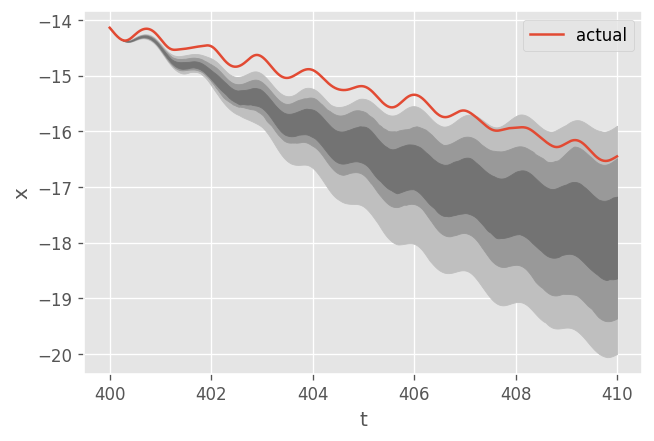

In [304]:

var = "x"
noise = "det"
name = "val_train"
nrs = 0
nrows = 1000

# Filtered data
tmp = sims[(sims.name == name) & (sims.variable == var) & (sims.noise == noise)].set_index("t").iloc[nrs:nrows]

# Plot
fig, ax = plt.subplots(dpi=120)
for i, lev in enumerate(reversed(sorted(params["levels"]))):
    ax.fill_between(
        tmp.index,
        y1=tmp[f"lower_{lev}"],
        y2=tmp[f"upper_{lev}"],
        color=str(0.9 - 0.15 * (i + 1)),
        label="",
    )
tmp[["actual"]].plot(ax=ax)
# tmp[["mean", "actual"]].plot(ax=ax)
ax.set_ylabel(var)

plt.show()

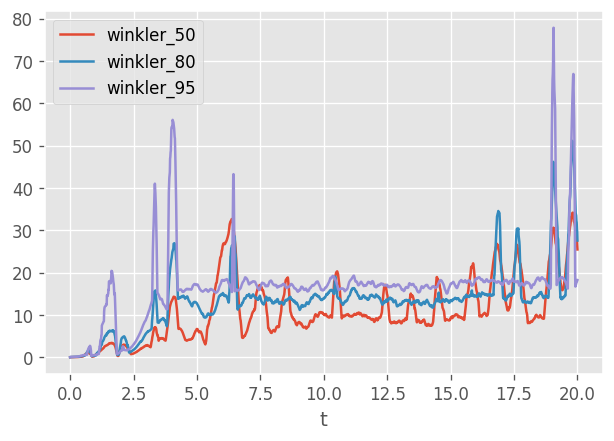

In [43]:
from evaluation import eval_preds

tmp, wcols = eval_preds(tmp)

fig, ax = plt.subplots(dpi=120)
tmp[wcols].plot(ax=ax)

plt.show()

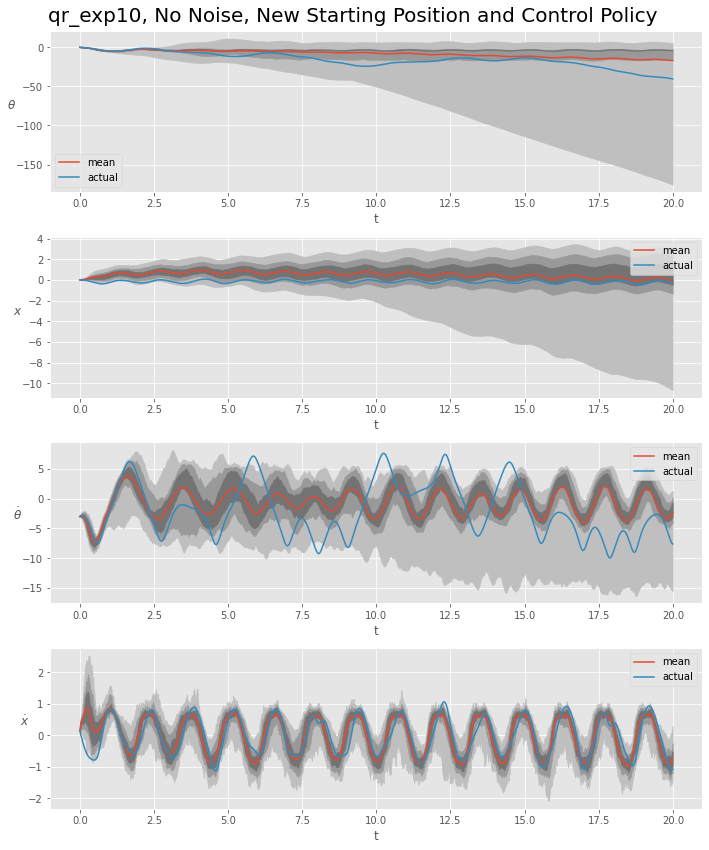

In [194]:
# Nice plot
noise = "det"
name = "test"
nrows = 2000  # seconds times 100

# Filtered data
df_filt = sims[(sims.name == name) & (sims.noise == noise)].set_index("t")

name_lookup = {
    "det": "No Noise",
    "low_noise": "0.1 Gaussian Noise",
    "high_noise": "0.5 Gaussian Noise",
}
data_lookup = {
    "train": "Training Data",
    "val_train": "Extending Trajectories",
    "valid": "Extending Trajectories",
    "test": "New Starting Position and Control Policy",
}
var_lookup = {
    "theta": r"$\theta$",
    "theta_d": r"$\dot{\theta}$",
    "x": r"$x$",
    "x_d": r"$\dot{x}$",
}
nice_name = ", ".join([model_name, name_lookup[noise], data_lookup[name]])


# Plot
fig, axes = plt.subplots(nrows=4, figsize=(10, 12))
for var, ax in zip(params["var_names"], axes):
    tmp = df_filt[df_filt.variable == var].iloc[:nrows]
    for i, lev in enumerate(reversed(sorted(params["levels"]))):
        ax.fill_between(
            tmp.index,
            y1=tmp[f"lower_{lev}"],
            y2=tmp[f"upper_{lev}"],
            color=str(0.9 - 0.15 * (i + 1)),
            label="",
        )
    tmp[["mean", "actual"]].plot(ax=ax)
    ax.set_ylabel(var_lookup[var], rotation=0)
fig.suptitle(nice_name, fontsize=20)
fig.tight_layout()
plt.show()

In [195]:
import pickle

noise = "high_noise"
# model_name = "qr_exp4"

with open(datapath/ f"model_objects/{model_name}_{noise}.pkl", "rb"
        ) as inp:
    model = pickle.load(inp)

model

2023-07-25 08:53:37,614 [INFO] 
Limited Total Variation Regularization Support Detected! 
---> CVXPY is not installed. 
---> Many Total Variation Methods require CVXPY including: 
---> velocity, acceleration, jerk, jerk_sliding, smooth_acceleration
---> Please install CVXPY to use these methods.
---> Recommended to also install MOSEK and obtain a MOSEK license.
You can still use: total_variation_regularization.iterative_velocity

2023-07-25 08:53:37,619 [INFO] 
Limited Linear Model Support Detected! 
---> PYCHEBFUN is not installed. 
---> Install pychebfun to use chebfun derivatives (https://github.com/pychebfun/pychebfun/) 
You can still use other methods 

2023-07-25 08:53:37,620 [INFO] 
Limited Linear Model Support Detected! 
---> CVXPY is not installed. 
---> Install CVXPY to use lineardiff derivatives 
You can still use other methods 

2023-07-25 08:53:37,627 [INFO] Limited support for total variation regularization and linear model detected!
                    ---> Some function

## Compare to true derivatives

In [196]:
from qr_simulation import _feature_transform

# Create grid of points to understand model predictions
rng = np.random.default_rng()

n = 100000
qs = [(1 - lev / 100) / 2 for lev in params["levels"]] + [1 - (1 - lev / 100) / 2 for lev in params["levels"]] + [0.5]
grid_df = pd.DataFrame({
    "theta": rng.uniform(-2 * np.pi, 4 * np.pi, size=n),
    # "x": rng.uniform(-5, 5, size=n),
    "theta_d": rng.uniform(-7, 7, size=n),
    "x_d": rng.uniform(-2, 2, size=n),
    "alpha": rng.choice(qs, size=n, replace=True),
    "force": 0,
})

# Make predictions from model
feats = model.feature_names_ + ["alpha"]
x = grid_df.reindex(columns=feats).to_numpy()
_, f_idx = _feature_transform(x, feats, convert_theta=False)
grid_df["pred_theta"] = model.models[0].predict(x[:, f_idx])
grid_df["pred_x"] = model.models[1].predict(x[:, f_idx])

# Estimate actual
p = {
    "mc": 1.0,
    "mp": 0.1,
    "len": 0.5,
    "mu_c": 0.00005,
    "mu_p": 0.000002,
    "k": 1 / 3,
    "f": lambda x: 0,
}
grid_df["act_theta"] = params["dt"] * (
    (p["mc"] + p["mp"]) * 9.8 * np.sin(grid_df.theta)
    - np.cos(grid_df.theta)
    * (
        0
        + p["mp"] * p["len"] * (grid_df.theta_d ** 2) * np.sin(grid_df.theta)
        - p["mu_c"] * grid_df.x_d
    )
    - ((p["mc"] + p["mp"]) * p["mu_p"] * grid_df.theta_d) / (p["mp"] * p["len"])
) / (
    (p["mc"] + p["mp"]) * (p["k"] + 1) * p["len"]
    - p["mp"] * p["len"] * (np.cos(grid_df.theta)) ** 2
)

grid_df["act_x"] = params["dt"] * (0
        - p["mp"] * p["len"] * (grid_df.act_theta * np.cos(grid_df.theta) - (grid_df.theta_d ** 2) * np.sin(grid_df.theta))
        - p["mu_c"] * grid_df.x_d
    ) / (p["mc"] + p["mp"])

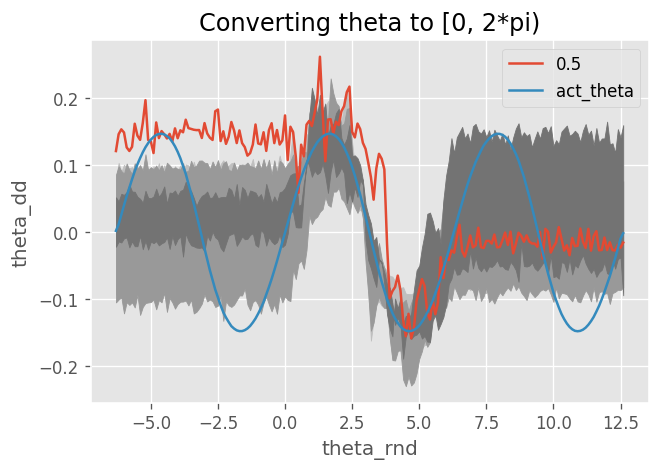

In [197]:
# Show values
x = "theta"
y = "theta"

grid_df[f"{x}_rnd"] = grid_df[x].round(1)
piv = pd.pivot_table(
    grid_df, index=f"{x}_rnd", columns="alpha", values=f"pred_{y}", aggfunc="mean"
).join(grid_df.groupby(f"{x}_rnd")[[f"act_{y}"]].mean())

# Plot
fig, ax = plt.subplots(dpi=120)
for i, lev in enumerate(reversed(sorted(params["levels"]))):
    lower = (1 - lev / 100) / 2
    upper = 1 - (1 - lev / 100) / 2
    ax.fill_between(
        piv.index,
        y1=piv[lower],
        y2=piv[upper],
        color=str(0.9 - 0.15 * (i + 1)),
        label="",
    )
piv[[0.5, f"act_{y}"]].plot(ax=ax)
ax.set_ylabel(f"{y}_dd")
# ax.set_title("Leaving theta as is")
ax.set_title("Converting theta to [0, 2*pi)")
plt.show()

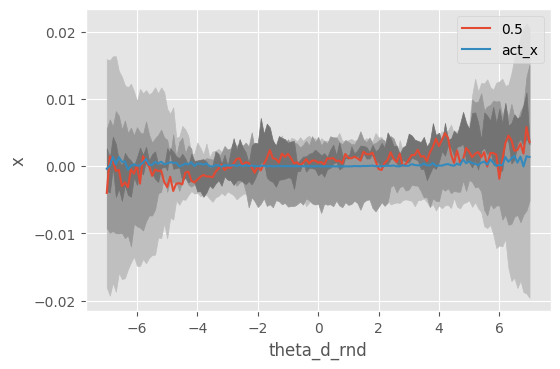

In [126]:
# Show values
x = "theta_d"
y = "x"

grid_df[f"{x}_rnd"] = grid_df[x].round(1)
piv = pd.pivot_table(
    grid_df, index=f"{x}_rnd", columns="alpha", values=f"pred_{y}", aggfunc="mean"
).join(grid_df.groupby(f"{x}_rnd")[[f"act_{y}"]].mean())

# Plot
fig, ax = plt.subplots(dpi=100)
for i, lev in enumerate(reversed(sorted(params["levels"]))):
    lower = (1 - lev / 100) / 2
    upper = 1 - (1 - lev / 100) / 2
    ax.fill_between(
        piv.index,
        y1=piv[lower],
        y2=piv[upper],
        color=str(0.9 - 0.15 * (i + 1)),
        label="",
    )
piv[[0.5, f"act_{y}"]].plot(ax=ax)
ax.set_ylabel(y)
plt.show()

In [128]:
params

{'name': 'qr_exp6',
 'model_name': 'QuantileRegressionSimulator',
 'model_params': {'m_factor': 100,
  'freq': 0.25,
  'alpha_dist': 'beta',
  'alpha_dist_params': {'a': 0.25, 'b': 0.25},
  'dt': 0.01,
  'model_params': {'num_iterations': 500, 'learning_rate': 0.01},
  'smooth_derv_est': False,
  'smoothing_samples': 100,
  'smoothing_perc': 0.95,
  'smoother': 'meandiff',
  'convert_theta': False,
  'random_state': 6},
 'datasets': ['det', 'high_noise'],
 'valid_train': True,
 'valid_valid': False,
 'valid_test': True,
 'train_seconds': 400,
 'n_sims': 100,
 'levels': [50, 80, 95],
 'var_names': ['theta', 'x', 'theta_d', 'x_d'],
 'random_state': 6,
 'valid_starts': {'val_train': [170.22460945052367,
   -14.137624190189436,
   3.3920950178722977,
   -1.1019033929411752],
  'train': [0.3, 0.0, 1.0, -0.72],
  'test': [-0.1, 0.0, -3.0, 0.15]},
 'dt': 0.01}